In [28]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [29]:
# import dataset 
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Projects\\Raw data\\Sample_data.csv') 
df.head()

,Age,Gender,weight_kg,medication,bmd
0,57,F,64.0,Anticonvulsant,0.8793
1,75,F,78.0,No medication,0.7946
2,70,M,73.0,No medication,0.9067
3,78,F,60.0,No medication,0.7112
4,54,M,55.0,No medication,0.7909


In [30]:
# One-hot encoding for gender
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_feature = encoder.fit_transform(df[['Gender']])

# Convert encoded feature back to DataFrame and concatenate with original data
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(['Gender']))
df_one_hot = pd.concat([df.drop('Gender', axis=1), encoded_df], axis=1)

print(df_one_hot)

# One-hot encoding for gender medication
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_feature = encoder.fit_transform(df_one_hot[['medication']])

# Convert encoded feature back to DataFrame and concatenate with original data
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(['medication']))
df_one = pd.concat([df_one_hot.drop('medication', axis=1), encoded_df], axis=1)

print(df_one)


     Age  weight_kg      medication     bmd  Gender_F  Gender_M
0     57       64.0  Anticonvulsant  0.8793       1.0       0.0
1     75       78.0   No medication  0.7946       1.0       0.0
2     70       73.0   No medication  0.9067       0.0       1.0
3     78       60.0   No medication  0.7112       1.0       0.0
4     54       55.0   No medication  0.7909       0.0       1.0
..   ...        ...             ...     ...       ...       ...
164   77       74.0   No medication  0.7941       0.0       1.0
165   50       59.0   No medication  0.7971       1.0       0.0
166   46       67.0   No medication  0.8037       0.0       1.0
167   54       70.0   No medication  0.8072       0.0       1.0
168   69       68.5   No medication  0.8664       1.0       0.0

[169 rows x 6 columns]
     Age  weight_kg     bmd  Gender_F  Gender_M  medication_Anticonvulsant  \
0     57       64.0  0.8793       1.0       0.0                        1.0   
1     75       78.0  0.7946       1.0       0.0     

In [32]:
# Define features and target
X = df_one[['Age','weight_kg','Gender_F']]
y = df_one['bmd']


In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0,max_depth=4)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train,y_train) 

DecisionTreeRegressor(max_depth=4, random_state=0)

In [42]:
# Predict on the test data
y_pred = regressor.predict(X_test)

# Print the results
print("Test set predictions:", y_pred)
print("Actual test set values:", y_test.values)

Test set predictions: [1.3624001  0.87075106 0.5931     0.87075106 0.87075106 0.77630666
 0.77630666 0.55790001 0.5931     0.77630666 0.87075106 0.87075106
 0.5931     0.87075106 0.77630666 0.77489    0.87075106 0.77630666
 0.77630666 0.87075106 0.69848335 0.87075106 0.5931     0.87075106
 0.87075106 0.87075106 0.87075106 0.87075106 0.87075106 1.3624001
 0.77630666 0.87075106 0.77630666 0.77630666]
Actual test set values: [0.62639999 1.0908999  0.45860001 0.9364     0.56150001 0.73989999
 0.79710001 0.55140001 0.70959997 0.70950001 0.80330002 0.6904
 0.56029999 0.81709999 0.7755     0.9824     0.81260002 1.0176001
 0.75099999 0.90100002 0.82539999 0.7978     0.80790001 0.78609997
 0.97600001 0.94660002 1.0502     0.83069998 1.0839     0.7999
 0.963      0.80129999 0.68800002 0.73140001]


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.041529018665421906

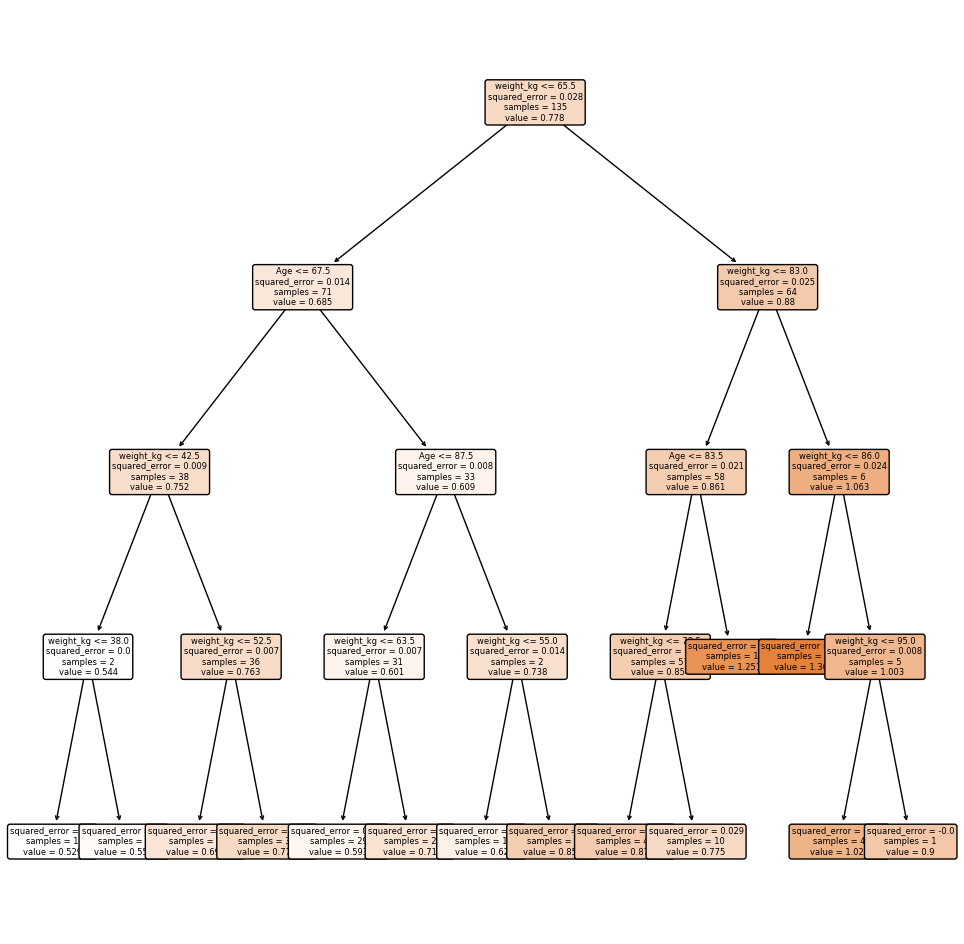

In [47]:
from sklearn import tree
plt.figure(figsize=(12,12))  # customize according to the size of your tree
_ = tree.plot_tree(regressor, feature_names = X.columns,filled=True, fontsize=6, rounded = True)
plt.show()